## Importing Libraries



In [1]:
# importing my custom module
import allcustommodules as sidra
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import cross_val_score
import Visualization_for_misclassifications as visual
import train_test_split_v2 as tts2
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

## Loading Data

In [2]:
filename = "../../../../datasets/vehicles.csv"
dataset = pd.read_csv(filename)
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


##  Exploring Dataset


In [3]:
dataset.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


General shape of data set, attributes list and categories list

In [4]:
sidra.data_stats(dataset)

=========== SOME STATS of Dataset ===========
Shape of the dataset: (846, 19)

List of attribute columns ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO', 'Class']


List of Categories  ['van' 'saab' 'bus' 'opel'] 



In [5]:
#checking the type of each attribute and seeing if we have missing values:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

As you can see from above result, there are 846 entries for the dataset and each column has 846 values as well, this means that we don't have any missing values

#### Checking for anomalies and if upsampling of data is required 
Verifying that dataset is homogenous (that is there are almost equal number of datapoints belonging to each category), you can see from the graph below that almost all classes have equal samples in the dataset (except Class: Van which has a slightly lesser representation, if the result of classifier shows missclassification for/of this class, we will try to augument its representation of this class in dataset in future)

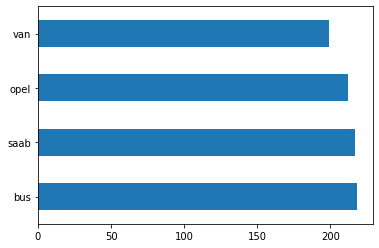

In [6]:
dataset['Class'].value_counts().plot(kind='barh')

## Understanding vehicle.csv dataset with the help of its codebook:
From https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes), information of the attributes are taken and stated here: 
COMPACTNESS (average perim)**2/area

CIRCULARITY (average radius)**2/area

DISTANCE CIRCULARITY area/(av.distance from border)**2

RADIUS RATIO (max.rad-min.rad)/av.radius

PR.AXIS ASPECT RATIO (minor axis)/(major axis)

MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)

SCATTER RATIO (inertia about minor axis)/(inertia about major axis)

ELONGATEDNESS area/(shrink width)**2

PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)

MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)

SCALED VARIANCE ALONG MAJOR AXIS  (2nd order moment about minor axis)/area

SCALED VARIANCE ALONG MINOR AXIS (2nd order moment about major axis)/area

SCALED RADIUS OF GYRATION (mavar+mivar)/area

SKEWNESS ABOUT MAJOR AXIS (3rd order moment about major axis)/sigma_min** 3

SKEWNESS ABOUT MINOR AXIS (3rd order moment about minor axis)/sigma_maj** 3

KURTOSIS ABOUT MINOR AXIS (4th order moment about major axis)/sigma_min** 4

KURTOSIS ABOUT MAJOR AXIS (4th order moment about minor axis)/sigma_maj** 4

HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

Where sigma_maj** 2 is the variance along the major axis and sigma_min** 2 is the variance along the minor axis, area of hollows= area of bounding poly-area of object


All the above attributes are measurements of vehicle silhouttes. Four "Corgie" model vehicles were used for the experiment:
a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. (Reference: https://www.openml.org/d/54)

# Objective of this task
By reading the above paragraph, we can see that it will be easier to make a classifier that can distinguish bus and van from vehicle dataset, but the main challenge would be to make a classifier that can also have good accuracy for Saab and Opel classes as well as  good F1 score for these classes(that is those it classifies  as Saab/Opel should be mostly the correct class, and those it classifies as not Saab/Opel should not be Saab/Opel class respectively)  .

## Tokenizing Target Column
Since random forest algo can only predict numbers we are tokenizing Class column/ Target values to numbers.

In [7]:
definitions = sidra.tokenize_target_column(dataset)

Updated tokenize 'Class' column - first 5 values
0    0
1    0
2    1
3    0
4    2
Name: Class, dtype: int64
Distinct Tokens used for converting Class column to integers
Index(['van', 'saab', 'bus', 'opel'], dtype='object')


## Finding the best train test split

In [8]:
X, y = sidra.training_data_and_target_Label_split(dataset)
estimator = RandomForestClassifier() #using default params for now
cv = 5
table = tts2.train_test_split_table_scores(estimator, X, y, cv)
table


,Train Percent,Test Percent,Split1,Split2,Split3,Split4,Split5,Training Scores Mean,Testing Scores Mean
0,7.92,92.080378,1.0,1.0,1.0,1.0,1.0,1.0,0.645402
1,25.89,74.113475,1.0,1.0,1.0,1.0,1.0,1.0,0.721044
2,43.85,56.146572,1.0,1.0,1.0,1.0,1.0,1.0,0.739986
3,61.82,38.179669,1.0,1.0,1.0,1.0,1.0,1.0,0.738775
4,79.91,20.094563,1.0,1.0,1.0,1.0,1.0,1.0,0.748235


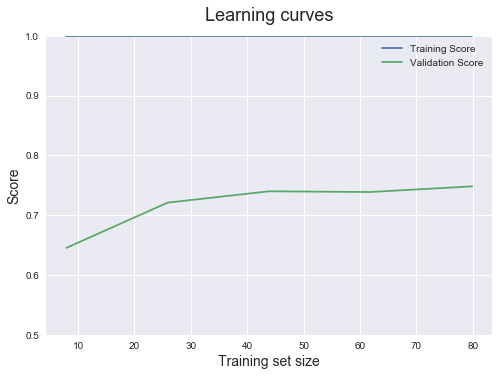

In [9]:
tts2.visual_tain_test_split_score(table)

In above graph and table you can see that the model with default parameters is  extremely overfitting training data, lets reduce no. of trees as it will reduce overfitting

In [10]:
estimator = RandomForestClassifier(n_estimators=5) #lets start from 5 trees
estimator.fit(X,y)
cv = 5
table = tts2.train_test_split_table_scores(estimator, X, y, cv=5)
table

,Train Percent,Test Percent,Split1,Split2,Split3,Split4,Split5,Training Scores Mean,Testing Scores Mean
0,7.92,92.080378,0.985075,0.955224,0.895522,0.970149,0.940299,0.949254,0.599262
1,25.89,74.113475,0.958904,0.949772,0.968037,0.977169,0.949772,0.960731,0.667929
2,43.85,56.146572,0.959569,0.964960,0.967655,0.973046,0.964960,0.966038,0.724511
3,61.82,38.179669,0.973231,0.978967,0.959847,0.967495,0.967495,0.969407,0.725778
4,79.91,20.094563,0.964497,0.961538,0.963018,0.973373,0.974852,0.967456,0.731653


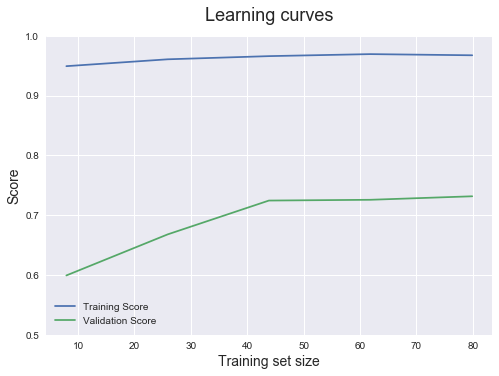

In [11]:
tts2.visual_tain_test_split_score(table)

## Train and Test data split
Now splitting data with 80 percent for training and 20 percent for testing as so far it is giving the best test score. (Although it needs more improvement)
We can do feature scaling here, opting out right now as I don't see any extreme values: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/ 

In [12]:
X, y = sidra.training_data_and_target_Label_split(dataset)
X_train, X_test, y_train, y_test = sidra.train_data_test_data_split(X,y, test_size=0.2)


## Training the model
Using Gridsearch, first I am identifying the best possible params and then using them to train model

In [13]:
# Using GridSearchCV to find best params:
# Using the most important features to avoid overcomplicating hyperparameter selection
parameters = {
    'n_estimators'      : [2, 4, 6, 8, 10, 12], 
    #since default  = 1000 led to extreme overfitting and we have just 846 datapoints so lets keeps number of trees small
    'max_depth'         : [8, 9, 10, 11, 12, 19, 20], #high numbers can lead to overfitting
    'random_state'      : [0],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14], # high numbers can lead to underfitting
    'max_features': ['auto', 'sqrt', None],
    'criterion' :['gini', 'entropy']
}



clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
print (clf.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 0}


In [14]:
clf = RandomForestClassifier(criterion= 'entropy', 
                             max_depth= 9, 
                             max_features= 'auto',
                             min_samples_split= 2,
                             n_estimators= 10, 
                             random_state= 0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Testing Model, checking accuracy and drawing confusion matrix 

In [15]:
y_pred = sidra.test(clf, X_test)

In [16]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705882352941177


### Converting numeric target and predict values back to original labels

In [17]:
y_test= sidra.untokenizing_testdata(y_test, definitions)
y_pred = sidra.untokenizing_prediction(y_pred, definitions)

## Analysis of missclassified points

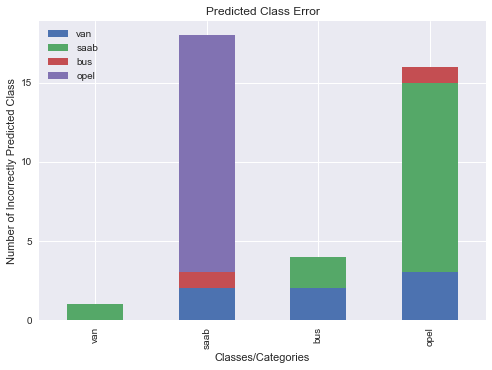

In [18]:
visual.missclassified_data_category_frquency(y_test, y_pred)

### Interpretation of the above graph
This graph can be thought of as "Graph of False Positives in Each Class". From the above graph, we can analyse that


A large number of incorrectly predicted datapoints are in Class: Saab, and datapoints that actually belonged to Class: Opel were incorrectly predicted to be of Class: Saab most often.
After that the second class containing most False Positives is Class: Opel and interestingly here Class: Saab datapoints were incorrectly identified as Class:Opel the most.
Seems like our model mixes Saab amd Opel and it is having a hard time differentiating the datapoints belonging to these 2 classes

====================== Confusion Matrix=====================


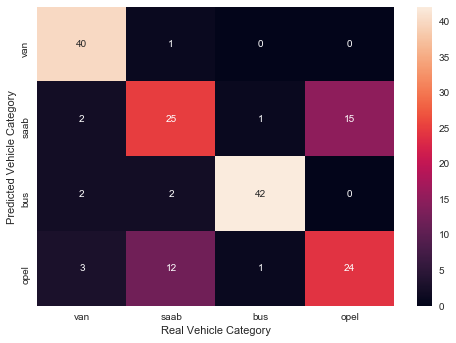

In [19]:
cm = sidra.create_confusion_matrix(y_test, y_pred)
sidra.display_confusion_matrix(cm)

In [20]:
sidra.display_classification_report(y_test,y_pred)

============== Summary of all evaluation metics ===============
              precision    recall  f1-score   support

         bus       0.95      0.91      0.93        46
        opel       0.62      0.60      0.61        40
        saab       0.62      0.58      0.60        43
         van       0.85      0.98      0.91        41

    accuracy                           0.77       170
   macro avg       0.76      0.77      0.76       170
weighted avg       0.77      0.77      0.77       170



### Conclusion:
Overall I got 77 percent accuaracy which doesn't seem good and more than that the precision and recall for class:opel and saab is almost 60 (this means we have alot of false positives and false negatives for these classes), next step will be to 
experiment with other models to see comparative performance of other models on this dataset.